In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [148]:
centroids = [(-5,-5),(5,6),(20,4)]
cluster_std = [1,1,1]

X,y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

In [149]:
y

array([0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2])

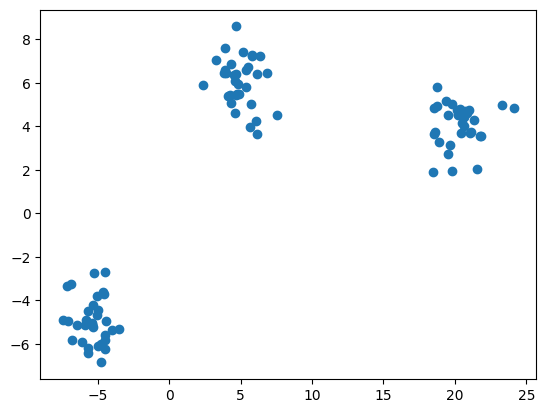

In [150]:
plt.scatter(X[:,0],X[:,1])

In [178]:
import numpy as np
import random

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        # Initialize centroids by randomly selecting points
        random_index = random.sample(range(X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for _ in range(self.max_iter):
            # Assign clusters
            cluster_group = self.assign_clusters(X)

            old_centroids = self.centroids.copy()
            self.centroids = self.move_centroids(X, cluster_group)

            # Check for convergence
            if np.allclose(old_centroids, self.centroids):
                break
        self.insertia = 0
        for centroid in self.centroids:
            for row in X:
                self.insertia += np.dot(row-centroid,row-centroid)

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        for row in X:
            distances = [np.linalg.norm(row - centroid) for centroid in self.centroids]
            cluster_group.append(np.argmin(distances))  # Find the index of the closest centroid
        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        for c in range(self.n_clusters):
            cluster_points = X[cluster_group == c]
            if len(cluster_points) > 0:  # Avoid empty cluster
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                new_centroids.append(self.centroids[c])  # Keep the same centroid if no points
        return np.array(new_centroids)

In [182]:
km = KMeans(n_clusters=3)
y_means = km.fit_predict(X)
y_means

array([0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2], dtype=int64)

In [183]:
print(km.insertia)

81383.91654190708


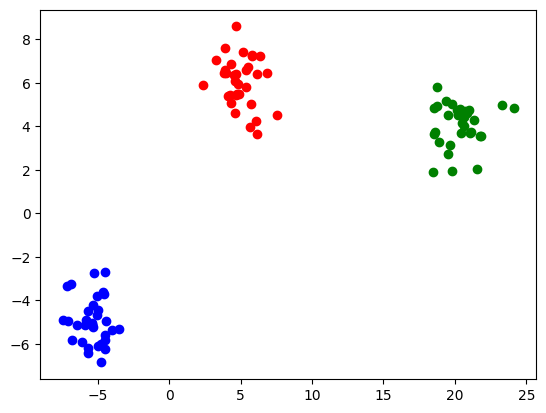

In [184]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color="blue")
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color="red")
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color="green")
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color="yellow")